In [1]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
from torchinfo import summary
import copy
import time

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from torch.nn import functional as F
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint

pl.seed_everything(9999)
random.seed(9999)

#tensorboard --logdir=lightning_logs/


Global seed set to 9999


(256, 256)
float32
0.06556451
-0.7497009


<Figure size 1200x800 with 0 Axes>

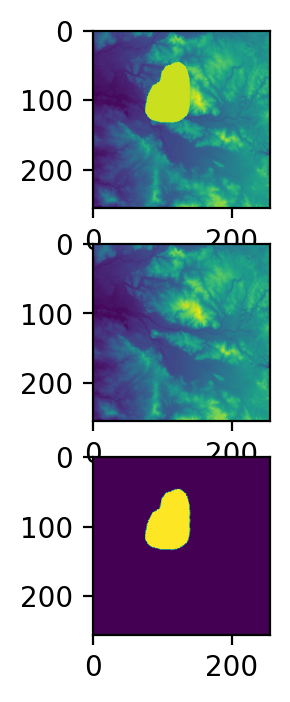

In [84]:
#Example
tmp_in, tmp_target, tmp_mask = train_dataset[4]

tmp_in_np = tmp_in.squeeze().numpy()
tmp_target_np = tmp_target.squeeze().numpy()
tmp_mask_np = tmp_mask.squeeze().numpy()

plt.figure()
f, axarr = plt.subplots(3,1) 
axarr[0].imshow(tmp_in_np)
axarr[1].imshow(tmp_target_np)
axarr[2].imshow(tmp_mask_np)

print(tmp_in_np.shape)
print(tmp_in_np.dtype)
print(tmp_in_np.max())
print(tmp_in_np.min())

<Figure size 1200x800 with 0 Axes>

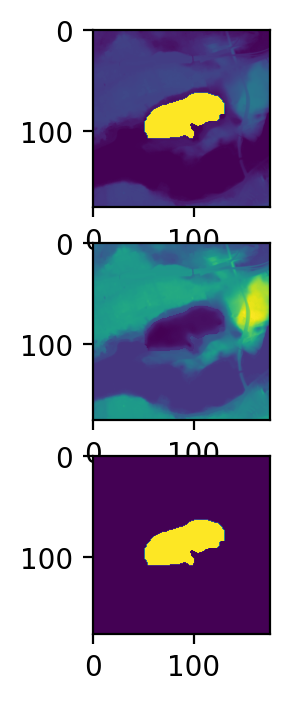

In [75]:
tmp_in_val, tmp_target_val, tmp_mask_val = valid_dataset[0]

tmp_in_val_np = tmp_in.squeeze().numpy()
tmp_target_val_np = tmp_target.squeeze().numpy()
tmp_mask_val_np = tmp_mask.squeeze().numpy()

plt.figure()
f, axarr = plt.subplots(3,1) 
axarr[0].imshow(tmp_in_val_np)
axarr[1].imshow(tmp_target_val_np)
axarr[2].imshow(tmp_mask_val_np)


In [23]:
model_example = AutoEncoder.load_from_checkpoint("lightning_logs/version_6/checkpoints/epoch=91-step=22999.ckpt")

In [30]:
tmp_in.max()

tensor(0.0683)

<Figure size 1200x800 with 0 Axes>

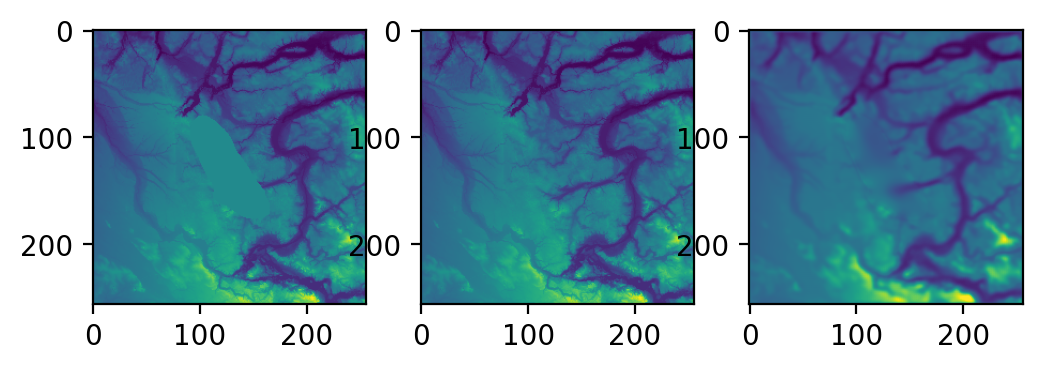

In [32]:
plt.rcParams['figure.dpi'] = 200

tmp_in, tmp_target, tmp_mask = valid_dataset[0]

with torch.no_grad():
    tmp_hat_np = model_example(tmp_in.unsqueeze(0), tmp_mask.unsqueeze(0))
    
tmp_in_np = tmp_in.squeeze().numpy()
tmp_target_np = tmp_target.squeeze().numpy()
tmp_mask_np = tmp_mask.squeeze().numpy()
tmp_hat_np = tmp_hat_np.squeeze().numpy()

plt.figure()
f, axarr = plt.subplots(1,3)
axarr[0].imshow(tmp_in_np)
axarr[1].imshow(tmp_target_np)
axarr[2].imshow(tmp_hat_np)
#axarr[3].imshow(tmp_target_np * tmp_mask_np)
#axarr[4].imshow(tmp_hat_np * tmp_mask_np)


In [56]:
#import dict
#original dims in profile
import pickle
with open('data/lakes_datasets.pickle', 'rb') as src:
    lakes_dict = pickle.load(src)

In [57]:
train_list = lakes_dict["train"]
valid_list = lakes_dict["valid"]
test_list = lakes_dict["test"]

train_ds = Lakes(train_list, train_transform)
valid_ds = Lakes(valid_list)
test_ds = Lakes(test_list)

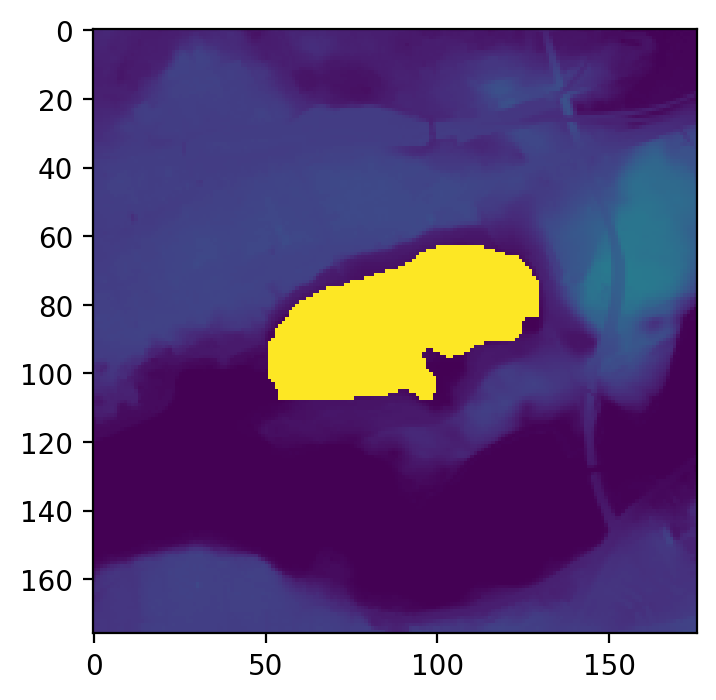

In [69]:
plt.imshow(tmp_target_np*(1-tmp_mask_np))

<Figure size 1200x800 with 0 Axes>

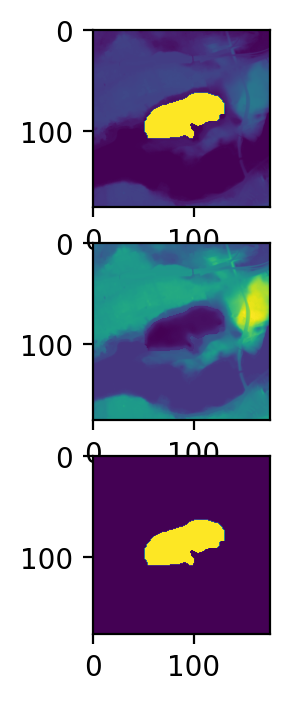

In [59]:
tmp_in, tmp_target, tmp_mask = train_ds[30]

tmp_in_np = tmp_in.squeeze().numpy()
tmp_target_np = tmp_target.squeeze().numpy()
tmp_mask_np = tmp_mask.squeeze().numpy()

plt.figure()
f, axarr = plt.subplots(3,1) 
axarr[0].imshow(tmp_in_np)
axarr[1].imshow(tmp_target_np)
axarr[2].imshow(tmp_mask_np)

In [40]:
train_dl = DataLoader(train_ds, batch_size=1, num_workers=0, shuffle = True)
valid_dl = DataLoader(valid_ds, batch_size=1, num_workers=0, shuffle = False)
test_dl = DataLoader(test_ds, batch_size=1, num_workers=0, shuffle = False)

In [44]:
lake_model = AutoEncoder.load_from_checkpoint("lightning_logs/version_6/checkpoints/epoch=91-step=22999.ckpt")


In [45]:
checkpoint_callback = ModelCheckpoint(monitor="val_hole_l1", save_last=True)

trainer = pl.Trainer(gpus=1,  
                     max_epochs=100,
                     callbacks=checkpoint_callback,
                     accumulate_grad_batches=8,
                    precision=16) 

Using 16bit native Automatic Mixed Precision (AMP)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [58]:

trainer.fit(lake_model, train_dl, valid_dl)


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name   | Type        | Params
---------------------------------------
0 | metric | MAELossHole | 0     
1 | unet   | UNet        | 1.9 M 
2 | loss   | MAELossHole | 0     
---------------------------------------
1.9 M     Trainable params
0         Non-trainable params
1.9 M     Total params
3.882     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

/home/kenneth/anaconda3/envs/lake_bathy/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:132: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
Global seed set to 9999
/home/kenneth/anaconda3/envs/lake_bathy/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:132: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [85]:
lake_model = AutoEncoder.load_from_checkpoint("lightning_logs/version_7/checkpoints/epoch=84-step=1104.ckpt")

<Figure size 1200x800 with 0 Axes>

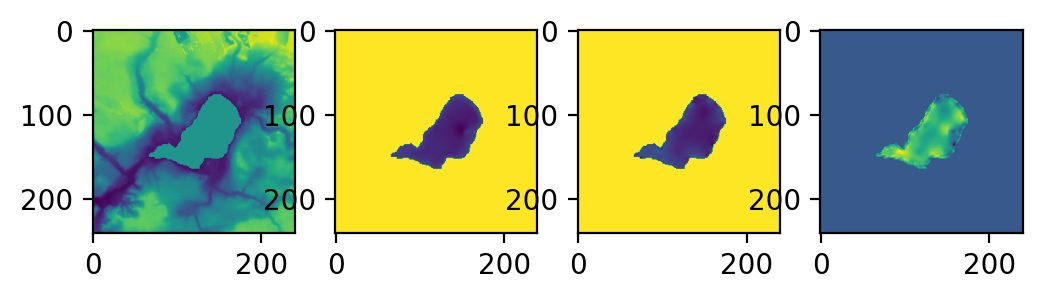

In [94]:
tmp_in, tmp_target, tmp_mask = valid_ds[21]

with torch.no_grad():
    tmp_hat_np = model_example(tmp_in.unsqueeze(0), tmp_mask.unsqueeze(0))
    
tmp_in_np = tmp_in.squeeze().numpy()
tmp_target_np = tmp_target.squeeze().numpy()
tmp_mask_np = tmp_mask.squeeze().numpy()
tmp_hat_np = tmp_hat_np.squeeze().numpy()

plt.figure()
f, axarr = plt.subplots(1,4)
axarr[0].imshow(tmp_in_np)
axarr[1].imshow(tmp_target_np*tmp_mask_np)
axarr[2].imshow(tmp_hat_np*tmp_mask_np)
axarr[3].imshow((tmp_hat_np*tmp_mask_np)-(tmp_target_np*tmp_mask_np))

In [95]:
#obs = [i["lake"] * i["mask"] for i in valid_list]
def nan_for_mask(item):
    lake = item["lake"]
    mask = item["mask"]
    
    lake_copy = lake.copy()
    
    lake_copy[mask == 0] = np.nan
    
    return(lake_copy)
    
obs = [nan_for_mask(i) for i in valid_list]

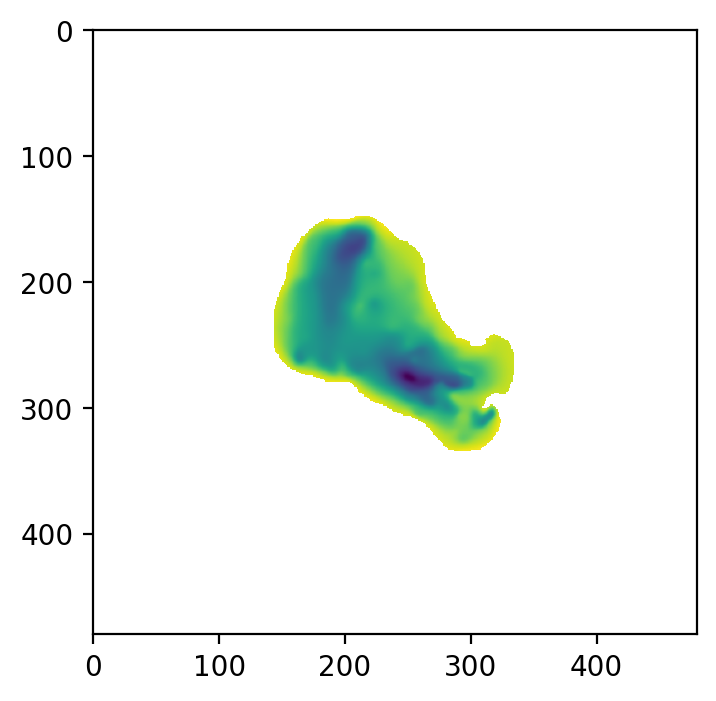

In [96]:
plt.imshow(obs[0])

In [97]:
def predict_func(x):
    
    lake = dem_scale(x["lake"])
    mask = x["mask"]
    
    target_tensor = torch.from_numpy(lake).unsqueeze(0)
    mask_tensor = torch.from_numpy(mask).unsqueeze(0)
    input_tensor = target_tensor * (1-mask_tensor)
    
    with torch.no_grad():
        xhat_tensor = lake_model(input_tensor.unsqueeze(0), mask_tensor.unsqueeze(0))
        
    xhat_np = xhat_tensor.squeeze().numpy()
    xhat_np_orig_scale = dem_inv_scale(xhat_np)
    #xhat_mask = xhat_np_orig_scale*mask
    xhat_np_orig_scale[mask == 0] = np.nan
    
    return(xhat_np_orig_scale)
    

In [98]:
pred = [predict_func(i) for i in valid_list]

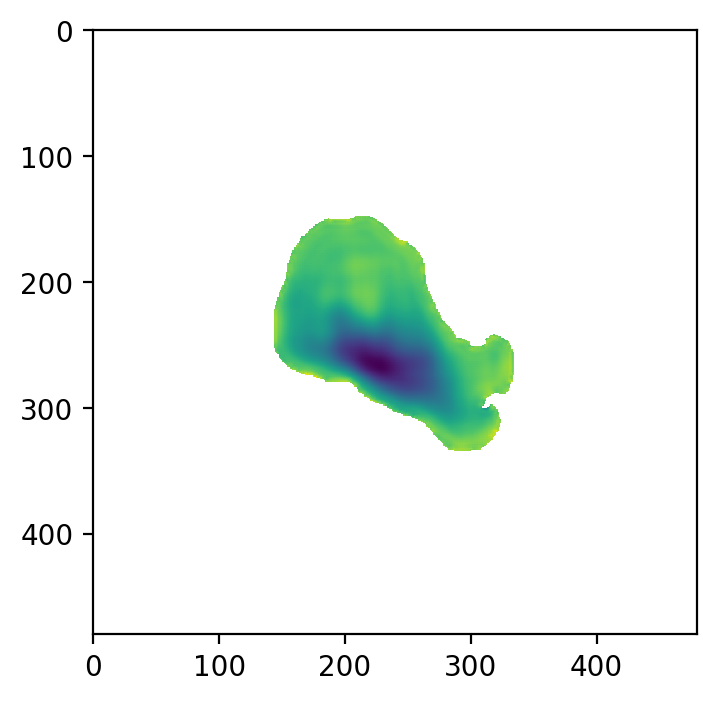

In [99]:
plt.imshow(pred[0])

In [100]:
lake_obs_mean = [np.nanmean(i) for i in obs]
lake_pred_mean = [np.nanmean(i) for i in pred]



In [101]:
obs_np = np.array(lake_obs_mean)
pred_np = np.array(lake_pred_mean)

print(np.sqrt(np.mean((obs_np-pred_np)**2)))
print(np.mean(np.abs(obs_np-pred_np)))


1.9442927
1.5361477


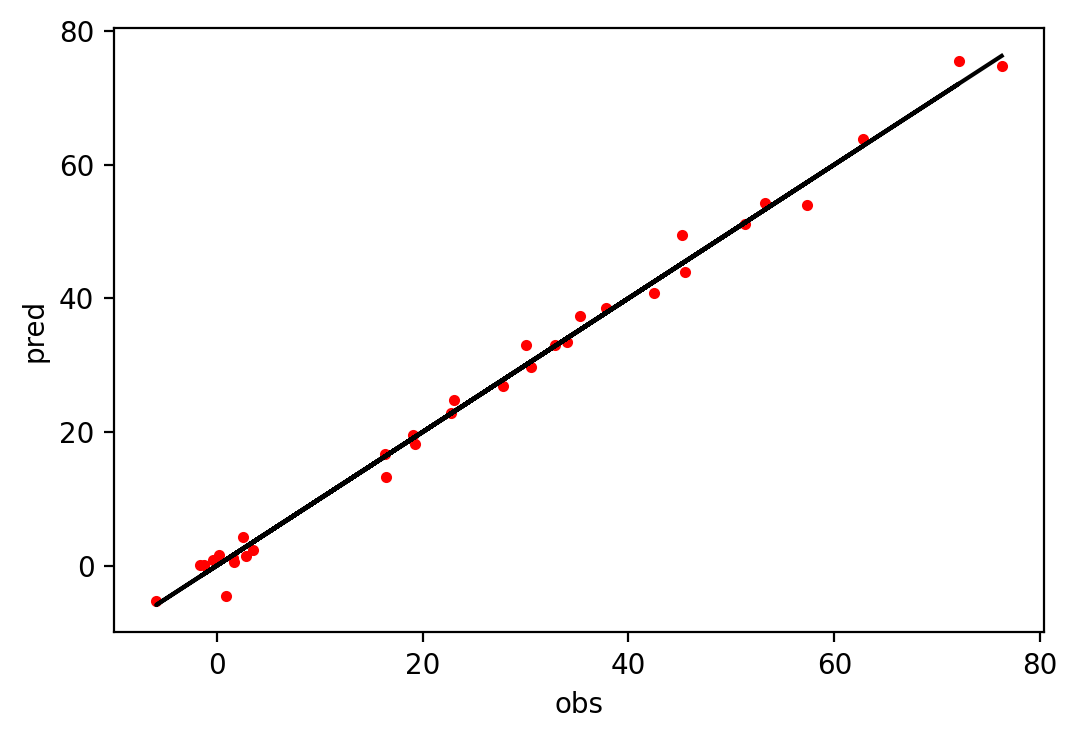

In [102]:
plt.plot(lake_obs_mean,lake_pred_mean,'r.') # x vs y
plt.plot(lake_obs_mean,lake_obs_mean,'k-') # identity line

plt.xlabel("obs")
plt.ylabel("pred")
plt.show()

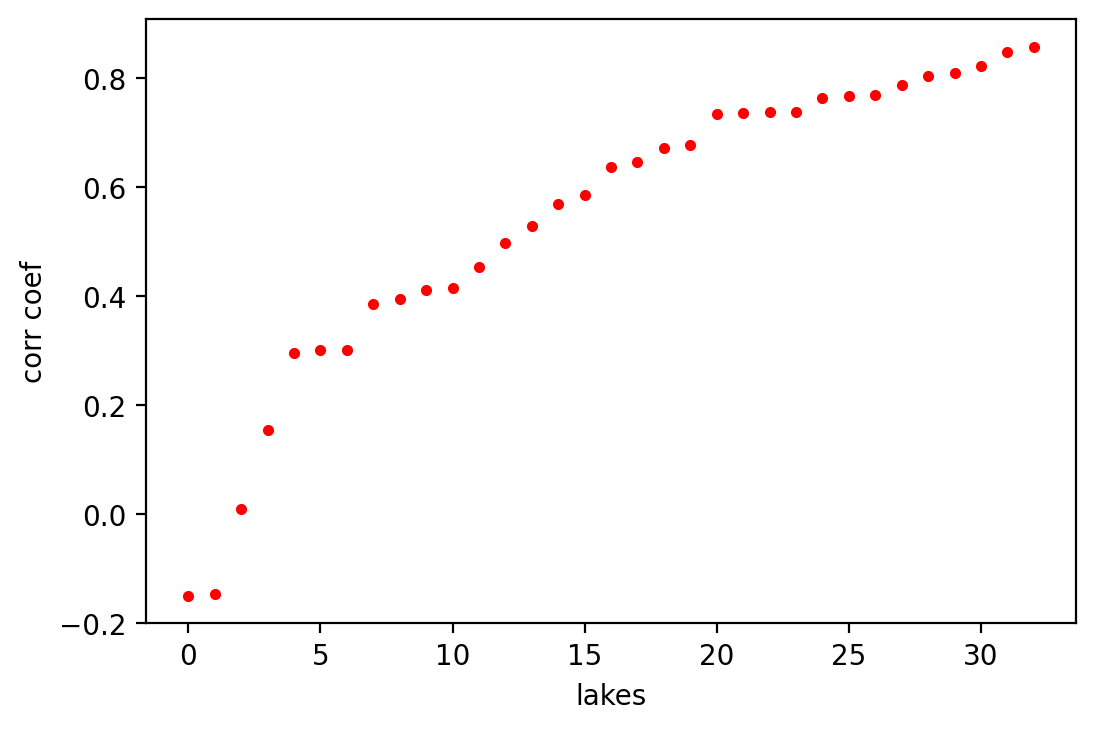

In [103]:
corr_list = [np.corrcoef(o[~np.isnan(o)], p[~np.isnan(p)]) for o, p in zip(obs, pred)]
plt.plot(sorted([i[1,0] for i in corr_list]), "r.")
plt.xlabel("lakes")
plt.ylabel("corr coef")
plt.show()

In [81]:
[(i["id"], c[1, 0]) for i, c in zip(valid_list, corr_list)]

[('lake_107', 0.6455226065427468),
 ('lake_52', 0.6717711227841806),
 ('lake_198', 0.3005377388481067),
 ('lake_92', 0.39478351641900694),
 ('lake_53', 0.636427825821312),
 ('lake_7', 0.6776931077117231),
 ('lake_19', 0.768971688794064),
 ('lake_211', 0.38604112615645264),
 ('lake_100', 0.4525113446333257),
 ('lake_162', 0.7377784298795256),
 ('lake_109', 0.300592594892587),
 ('lake_106', 0.009918961386643442),
 ('lake_31', 0.15358362954758825),
 ('lake_14', 0.7640321339185709),
 ('lake_39', 0.8096419324335405),
 ('lake_72', 0.2953729401207657),
 ('lake_163', 0.7370304143201727),
 ('lake_68', 0.41138855888751863),
 ('lake_61', 0.5849622622722063),
 ('lake_67', 0.8028478684984275),
 ('lake_29', 0.4153783620493692),
 ('lake_34', 0.821849383756204),
 ('lake_165', 0.7674159846118922),
 ('lake_194', 0.5696165323686209),
 ('lake_23', 0.5290113027458567),
 ('lake_137', 0.4972219415965871),
 ('lake_129', -0.1505287899115938),
 ('lake_69', 0.7343276212684373),
 ('lake_42', -0.14663246704965283)